# 1. Importing data from the Internet

Web adalah sumber data yang kaya yang dapat digunakan untuk mengekstraksi berbagai jenis wawasan dan temuan. Dalam bab ini, Anda akan belajar cara mendapatkan data dari web, apakah itu disimpan dalam file atau dalam HTML. Anda juga akan mempelajari dasar-dasar `scraping` dan `parsing` data web.

## Importing flat files from the web

### Importing flat files from the web: your turn!

Anda akan mengimpor file pertama Anda dari web! File flat yang akan Anda impor adalah `'winequality-red.csv'` dari University of California, repositori [Machine Learning Irvine](http://archive.ics.uci.edu/ml/index.html). File flat berisi data tabular dari sifat-sifat fisiokimia dari anggur merah, seperti pH, kadar alkohol dan kadar asam sitrat, bersama dengan peringkat kualitas anggur.

URL file tersebut adalah

* `'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'`

In [1]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Opening and reading flat files from the web

Anda baru saja mengimpor file dari web, menyimpannya secara lokal dan memuatnya ke dalam DataFrame. Jika Anda hanya ingin memuat file dari web ke dalam DataFrame tanpa terlebih dahulu menyimpannya secara lokal, Anda dapat melakukannya dengan mudah menggunakan `pandas`. Secara khusus, Anda dapat menggunakan fungsi `pd.read_csv()` dengan URL sebagai argumen pertama dan pemisah `sep` sebagai argumen kedua.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

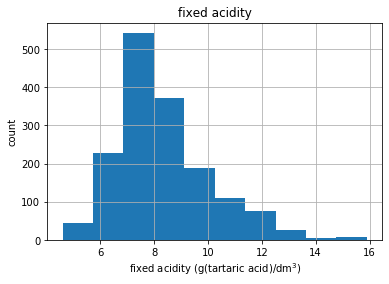

In [3]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

### Importing non-flat files from the web

Selamat! Anda baru saja memuat file flat dari web ke dalam DataFrame tanpa terlebih dahulu menyimpannya secara lokal menggunakan fungsi pandas `pd.read_csv()`. Fungsi ini sangat keren karena memiliki kerabat dekat yang memungkinkan Anda memuat semua jenis file, tidak hanya yang flat. Dalam latihan interaktif ini, Anda akan menggunakan `pd.read_excel()` untuk mengimpor spreadsheet Excel.

URL spreadsheet adalah

* `'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'`

Tugas Anda adalah menggunakan `pd.read_excel()` untuk membaca semua sheets, cetak nama sheet, lalu cetak header sheet pertama *menggunakan namanya, bukan indeksnya*.

Perhatikan bahwa output `pd.read_excel()` adalah Python dictionary dengan nama sheet sebagai kunci dan DataFrames terkait sebagai nilai yang sesuai.

In [4]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## HTTP requests to import files from the web

### Performing HTTP requests in Python using urllib

Sekarang setelah Anda mengetahui dasar-dasar di balik permintaan HTTP GET, saatnya untuk melakukan beberapa dari Anda sendiri. Dalam latihan interaktif ini, Anda akan melakukan ping ke server DataCamp kami sendiri untuk melakukan permintaan GET dan mengekstrak informasi dari halaman, `"http://www.datacamp.com/teach/documentation"`.

Dalam latihan selanjutnya, Anda akan mengekstrak HTML itu sendiri. Saat ini, bagaimanapun, Anda akan mengemas dan mengirim permintaan dan kemudian menangkap *response*.

In [5]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


### Printing HTTP request results in Python using urllib

Anda baru saja mengemas dan mengirim permintaan GET ke `"http://www.datacamp.com/teach/documentation"` dan kemudian menangkap response nya. Anda melihat bahwa respons adalah objek `http.client.HTTPResponse`. Pertanyaannya: apa yang dapat Anda lakukan dengan respons ini?

Nah, karena berasal dari halaman HTML, Anda bisa membacanya untuk mengekstrak HTML dan, pada kenyataannya, objek `http.client.HTTPResponse` tersebut memiliki metode `read()` yang terkait. Dalam latihan ini, Anda akan membangun karya hebat Anda sebelumnya untuk mengekstrak respons dan mencetak HTML.

In [6]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="OsBGojGJJenq6nVgzDboQ8aRdwjlO2O2dzSYeYGNv40="></script>\n      <script nonce="OsBGojGJJenq6nVgzDboQ8aRdwjlO2O2dzSYeYGNv40=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">\n\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Cen

### Performing HTTP requests in Python using requests

Sekarang karena Anda sudah bisa membuat permintaan HTTP menggunakan paket urllib, Anda akan mengetahui cara melakukan hal yang sama menggunakan pustaka permintaan tingkat tinggi. Sekali lagi Anda akan melakukan ping ke server DataCamp untuk halaman `"http://www.datacamp.com/teach/documentation"`.

Perhatikan bahwa tidak seperti pada latihan sebelumnya menggunakan urllib, Anda tidak harus menutup koneksi saat menggunakan requests!

In [7]:
# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="AkkGAy0OB1NNAHDfStiV5+OZTa9FtO+ZUPuENtHUjDs="></script>
      <script nonce="AkkGAy0OB1NNAHDfStiV5+OZTa9FtO+ZUPuENtHUjDs=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">

      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">

      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&qu

## Scraping the web in Python

### Parsing HTML with BeautifulSoup

Dalam latihan interaktif ini, Anda akan belajar cara menggunakan paket BeautifulSoup untuk mem-parsing, mendisain dan mengekstrak informasi dari HTML. Anda akan mengorek data dari halaman web Guido van Rossum, [Diktator Benevolent for Life](https://en.wikipedia.org/wiki/Benevolent_dictator_for_life) milik Python sendiri. Dalam latihan-latihan berikut, Anda akan mendisain HTML dan kemudian mengekstrak teks dan hyperlink.

Url --> `'https://www.python.org/~guido/'`

In [8]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
   <h3>
    <a href="images/df20000406.jpg">
     Who I Am
    </a>
   </h3>
   <p>
    Read
my
    <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
     "King's
Day Speech"
    </a>
    for some inspiration.
    <p>
     I am the author of the
     <a href="http://www.python.org">
      Python
     </a>
     programming language.  See also my
     <a href="Resume.html">
      resume
     </a>
     and my
     <a href="Publications.h

### Turning a webpage into data using BeautifulSoup: getting the text

Seperti yang dijanjikan, dalam latihan berikut, Anda akan mempelajari dasar-dasar mengekstraksi informasi dari HTML soup. Dalam latihan ini, Anda akan mengetahui cara mengekstrak teks dari halaman web BDFL, bersama dengan mencetak judul halaman web.

In [9]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am retired, working on personal projects (and maybe a book).
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead refer you to
help (at) python.org,
comp.lang.python or
StackOverflow.  If you need to
talk t

### Turning a webpage into data using BeautifulSoup: getting the hyperlinks

Dalam latihan ini, Anda akan mengetahui cara mengekstraksi URL hyperlink dari halaman web BDFL. Dalam prosesnya, Anda akan banyak menggunakan metode soup `find_all()`.

In [10]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif
